In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/ag-fruits'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data
### from:
American gut: an open platform for citizen science microbiome research.

McDonald, Daniel, Embriette Hyde, Justine W. Debelius, James T. Morton, Antonio Gonzalez, Gail Ackermann, Alexander A. Aksenov et al. 

Msystems 3, no. 3 (2018): e00031-18.

https://doi.org/10.1128/mSystems.00031-18

In [7]:
ca.set_log_level('ERROR')

dat=ca.read_amplicon('./all.ag.biom',
                    './map.ag.txt',
                    min_reads=1000,
                    normalize=10000)

ca.set_log_level('INFO')


# We will look at the fecal samples

In [8]:
fec=dat.filter_samples('BODY_PRODUCT','UBERON:feces')
del dat

In [9]:
fecc=fec.filter_sum_abundance(50)
# merge all samples from a single individual into one sample
fecc=fecc.aggregate_by_metadata('HOST_SUBJECT_ID')

2022-06-26 11:37:14 INFO After filtering, 9720 remain.


In [11]:
def merge_freq(exp, field, new_field='freq'):
    '''merge an ag field with frequecy data
        into a new field with only 2 values (high/low)
    
    input:
    exp
    field : str
        the field to merge
    new_field : str (optional)
        name of the new field
        
    returns
    newexp: calour.Experiment, with values in 2 categories - high & low
    '''
    newexp = exp.copy()
    newexp.sample_metadata[new_field]=newexp.sample_metadata[field].copy()
    newexp.sample_metadata[new_field].replace(['Regularly (3-5 times/week)','Daily'],'high fruit',inplace=True)
    newexp.sample_metadata[new_field].replace(['Rarely (a few times/month)','Never','Occasionally (1-2 times/week)'],'low fruit',inplace=True)
    newexp=newexp.filter_samples(new_field,['low fruit','high fruit'],inplace=True)
    return newexp

In [12]:
tt=merge_freq(fecc,'FRUIT_FREQUENCY')
tt=cu.equalize_groups(tt,'freq',['AGE_CAT','SEX','BMI_CAT'], random_seed=2022)
tt=tt.filter_sum_abundance(10)
dd=tt.diff_abundance('freq','high fruit','low fruit',random_seed=2022)

2022-06-26 11:37:47 INFO After filtering, 7245 remain.
2022-06-26 11:37:48 INFO 2142 samples with both values
2022-06-26 11:37:48 INFO After filtering, 7245 remain.
2022-06-26 11:37:49 INFO 1071 samples with value 1 (['high fruit'])
2022-06-26 11:37:56 INFO number of higher in high fruit: 45. number of higher in low fruit : 41. total 86


2022-06-26 11:37:57 INFO Getting dbBact annotations for 86 sequences, please wait...
2022-06-26 11:37:57 INFO Limited to maximal annotationid: 7440
2022-06-26 11:37:59 INFO got 2124 annotations
2022-06-26 11:37:59 WARNING ignoring 0 annotation with id > max_id 7440
2022-06-26 11:37:59 INFO Got 10857 annotation-sequence pairs
2022-06-26 11:37:59 INFO Added annotation data to experiment. Total 2124 annotations, 86 ASVs
2022-06-26 11:37:59 INFO Found 1 experiments ([63]) matching current experiment - ignoring them.
2022-06-26 11:38:01 INFO found 7 negative
2022-06-26 11:38:01 INFO found 7 positive


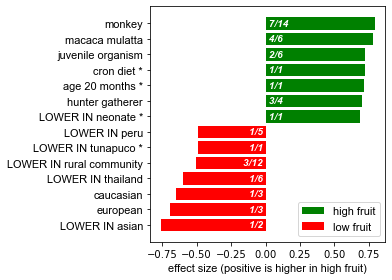

In [13]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [14]:
f.figure.savefig('./fig-terms-fruit-consumption.pdf')

In [15]:
e.save('./table-terms-fruit-consumption')

2022-06-26 11:38:02 INFO Metadata field taxonomy not found. Saving biom table without metadata


2022-06-26 11:38:02 INFO Found 1 experiments ([63]) matching current experiment - ignoring them.
2022-06-26 11:38:02 INFO found 80 annotations with the term ['monkey']
2022-06-26 11:38:06 INFO ignored 0 annotations
2022-06-26 11:38:06 WARNING Clipped term circle size to 100. Real size (number of term seqs not overlapping) should be: 5248


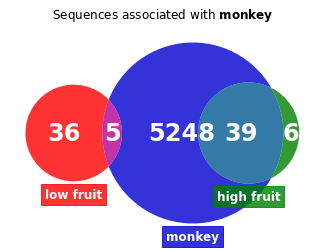

In [16]:
f=db.plot_term_venn_all('monkey',dd,max_size=100, ignore_exp=True,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':24},max_id=7440)

In [17]:
f.savefig('./fig-venn-monkey.pdf')